## 📦 Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
from scipy import stats  
warnings.filterwarnings('ignore')

In [2]:
#Connecting to Database & Reading Data
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query("SELECT * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,580320,15245006.40,284098.0,10203839.02,1345638.62,521998.40,137203.36,-5041167.38,-49.404615,0.489554,0.669323
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,656152,15216164.88,320494.0,9638146.98,1123024.74,588877.32,289858.48,-5578017.90,-57.874381,0.488445,0.633415
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,749628,13673214.72,374280.0,9076241.20,922280.30,687708.14,247560.44,-4596973.52,-50.648428,0.499288,0.663797
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,806728,13044791.76,400824.0,8951945.76,840100.02,736485.60,514064.14,-4092846.00,-45.720183,0.496851,0.686247
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,552436,12092824.04,271676.0,8446215.24,1091556.56,499175.66,514064.14,-3646608.80,-43.174472,0.491778,0.698449


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,1.256355e+04,44380.347075,4.00,144.000000,1048.000000,7903.000000,1.350640e+06
TotalPurchaseDollars,10692.0,1.204268e+05,492271.198508,2.84,1813.830000,14621.860000,82952.980000,1.524501e+07
TotalSalesQuantity,10692.0,6.154964e+03,21905.702782,0.00,66.000000,522.000000,3858.500000,6.698780e+05
TotalSalesDollars,10692.0,8.447815e+04,335310.531968,0.00,1458.440000,10596.090000,56793.830000,1.020384e+07
TotalSalesPrice,10692.0,3.758757e+04,89905.546771,0.00,579.420000,5715.600000,32119.125000,1.345639e+06


## 📊 Visualizing Distributions of Numerical Columns

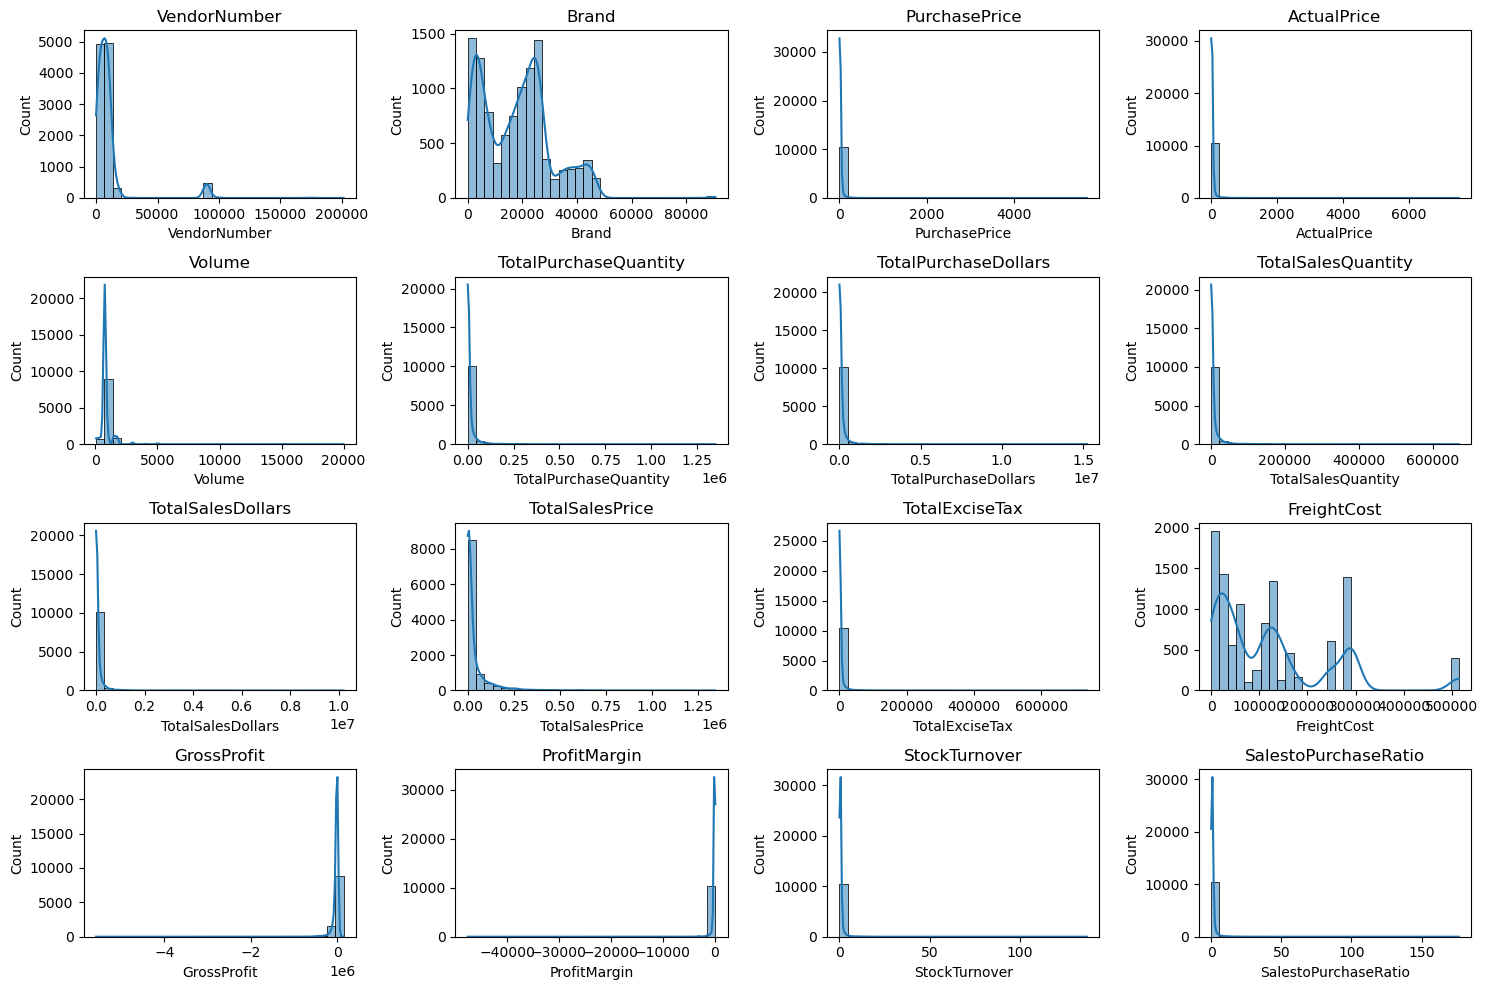

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize =(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()


## 📦 Boxplot Visualization of Numerical Features

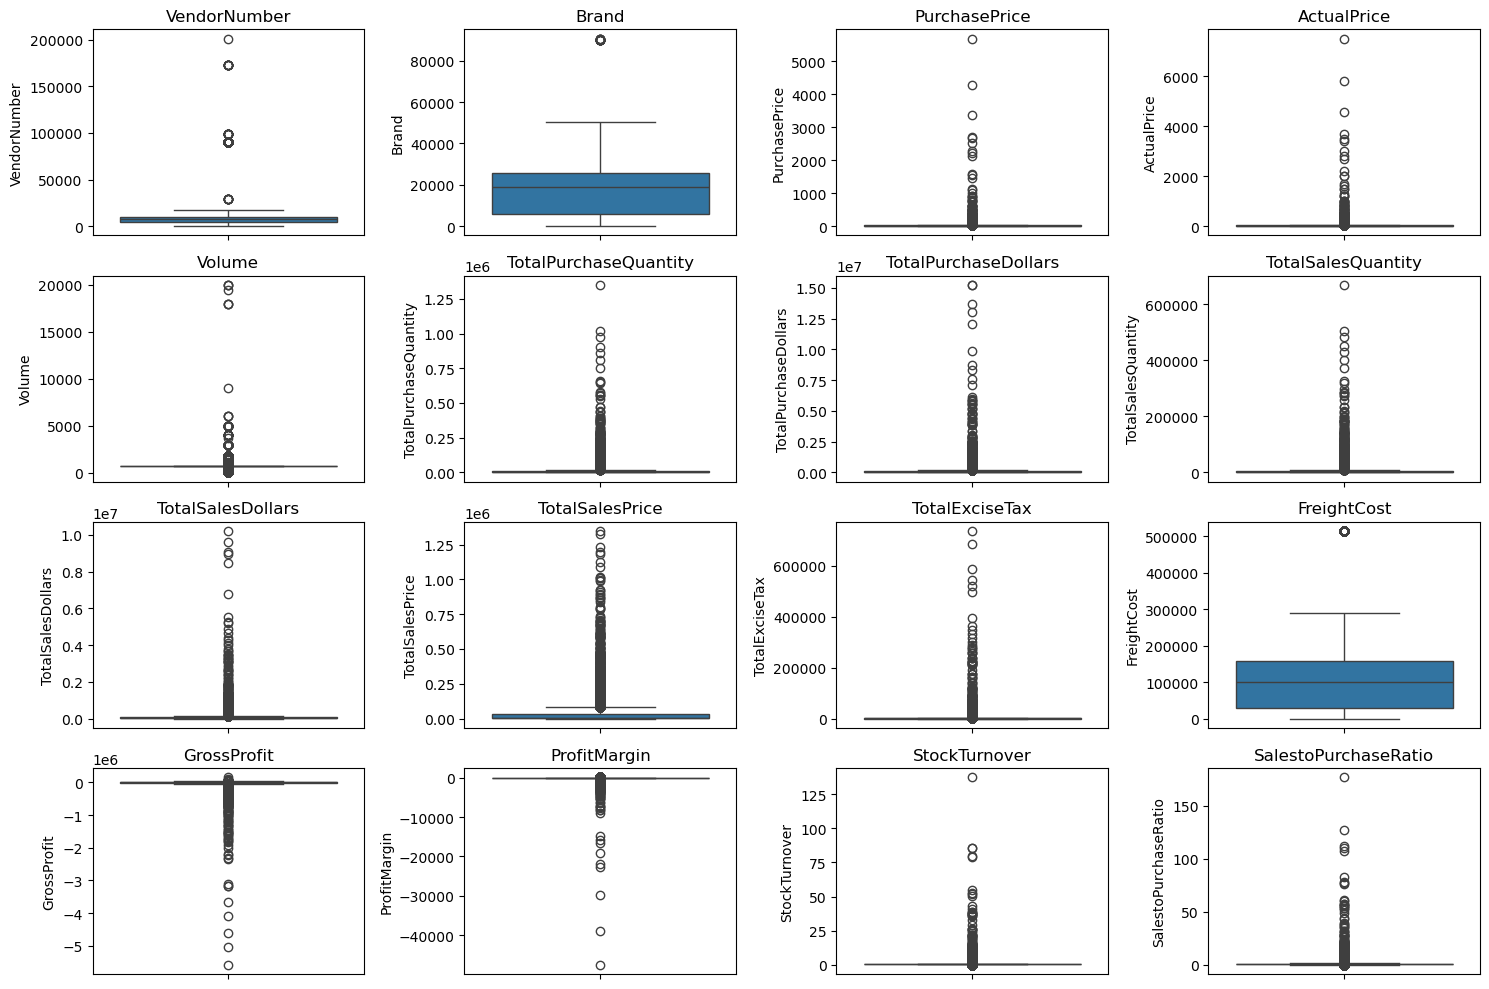

In [9]:
plt.figure(figsize =(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [242]:
#Filter Valid Vendor Sales Records
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [17]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,4425,MARTIGNETTI COMPANIES,6983,J Lohr Seven Oaks Cab Svgn,8.27,11.99,750.0,94304,779894.08,51406.0,816295.94,263413.78,5752.48,289858.48,36401.86,4.459395,0.545109,1.046675
1,7153,PINE STATE TRADING CO,44228,Clean Slate Rsl Mosel,5.59,10.99,750.0,58508,327059.72,31436.0,333037.14,139279.10,3507.30,31769.64,5977.42,1.794821,0.537294,1.018276
2,1392,CONSTELLATION BRANDS INC,6599,Estancia Cab Svgn Paso Roble,5.78,12.99,750.0,55724,322084.72,27676.0,325406.24,132239.54,3090.56,159057.98,3321.52,1.020730,0.496662,1.010313
3,1392,CONSTELLATION BRANDS INC,15229,The Prisoner Red Napa Valley,26.11,40.99,750.0,11748,306740.28,8288.0,355137.12,184966.92,921.74,159057.98,48396.84,13.627649,0.705482,1.157778
4,4425,MARTIGNETTI COMPANIES,24786,Opus One 12,159.73,245.99,750.0,1748,279208.04,1278.0,317927.22,86080.54,143.54,289858.48,38719.18,12.178630,0.731121,1.138675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,8,11.36,28.0,55.72,11.94,1.46,514064.14,44.36,79.612347,3.500000,4.904930
1772,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,8,10.56,10.0,31.90,21.92,1.10,54200.82,21.34,66.896552,1.250000,3.020833
1773,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,24,9.36,268.0,131.32,2.94,14.08,100587.24,121.96,92.872373,11.166667,14.029915
1774,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,4,5.88,144.0,286.56,155.22,30.24,514064.14,280.68,97.948074,36.000000,48.734694


## 📊 Count Plot of Categorical Variables

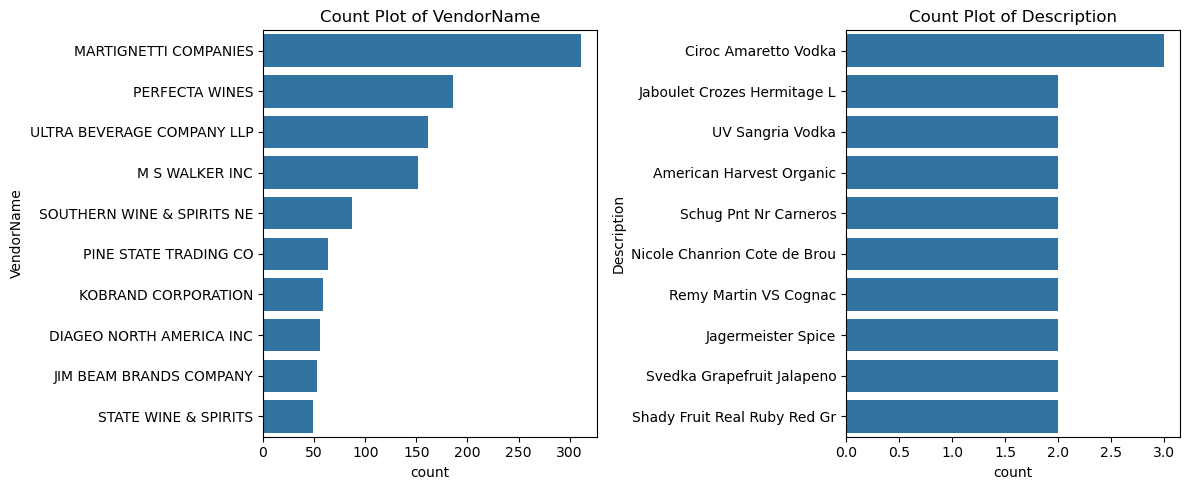

In [19]:
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize =(12, 5))
for i, col in enumerate (categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(df[col], order = df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

## 🔗 Correlation Heatmap of Numerical Features

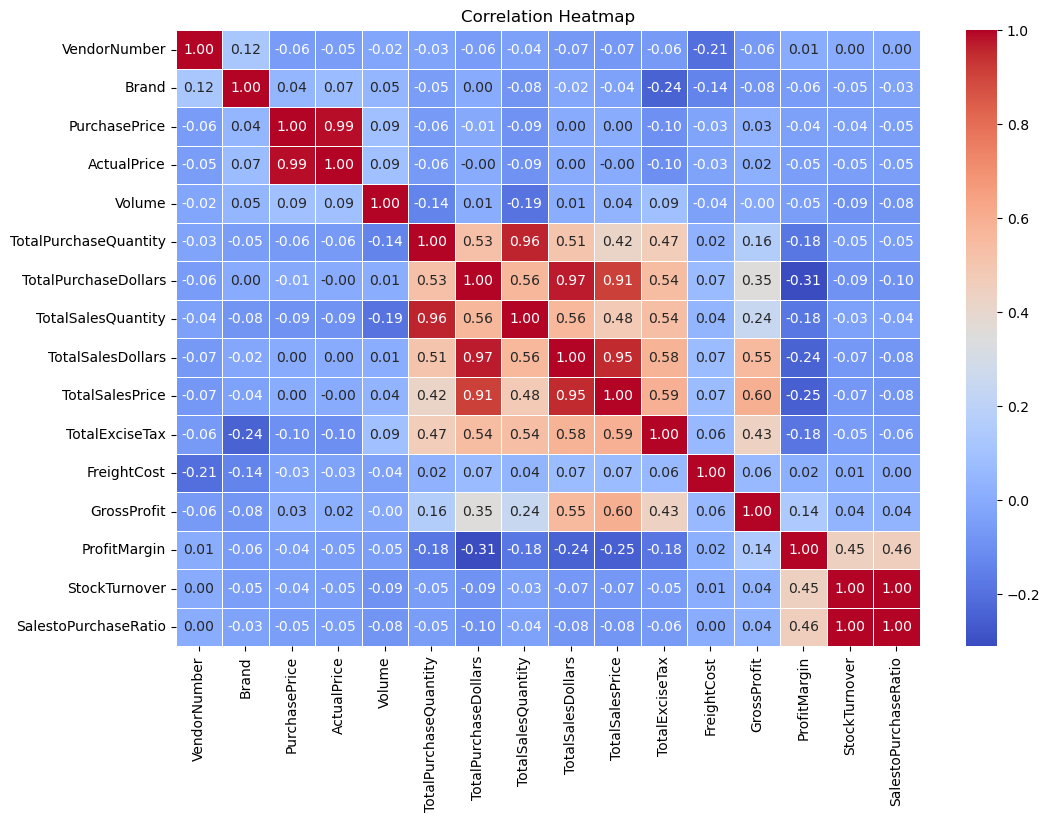

In [21]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt =".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows relationships between numerical features in the dataset. 
Strong positive correlations were observed between `PurchasePrice` and `ActualPrice`, as well as between `TotalSalesQuantity` and `TotalPurchaseQuantity`. 
`ProfitMargin` has a moderate positive correlation with `StockTurnover`, indicating that faster inventory movement may lead to better profit margins. 
This analysis helps identify redundant features and understand which variables are more influential.

In [31]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin':'mean'}).reset_index()

In [33]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [35]:
low_sales_threshold

970.1519999999998

In [37]:
high_margin_threshold

82.48640456102117

# Filtering brands with low sales and high margins

In [43]:
target_brand = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
print("Total rows:", target_brand.shape[0])
print("Total columns:", target_brand.shape[1])
display(target_brand.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:
Total rows: 37
Total columns: 3


,Description,TotalSalesDollars,ProfitMargin
668,Dr McGillicuddy's Apple Pie,131.32,92.872373
1313,Promesses de France CdRhone,143.82,84.675289
1585,The Club Mudslide,167.16,82.651352
1605,Three Olives Grape Vodka,170.28,98.332159
71,Aresti Pnt Nr Curico Vly,189.62,93.080899
1586,The Club Strawbry Margarita,286.56,97.948074
1273,Piehole Apple Pie,312.84,94.476410
1361,Riunite Sweet White,323.46,94.929821
1409,Sauza Sparkling Margarita,335.52,93.586075
609,DeKuyper Buttershots Trav,351.68,91.878981


In [59]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

# 📊 Visualizing Brands for Promotional or Pricing Adjustments

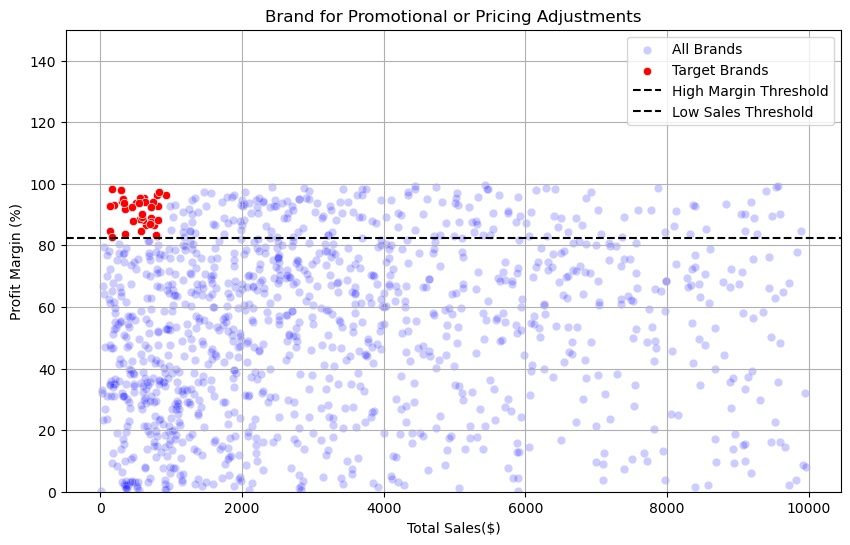

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = brand_performance, x='TotalSalesDollars', y ='ProfitMargin', color ='blue', label='All Brands', alpha =0.2)
sns.scatterplot(data = target_brand, x='TotalSalesDollars', y ='ProfitMargin', color ='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle= '--', color ='black', label= 'High Margin Threshold')
plt.axhline(low_sales_threshold, linestyle= '--', color ='black', label= 'Low Sales Threshold')

plt.xlabel('Total Sales($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brand for Promotional or Pricing Adjustments')
plt.legend()
plt.ylim(0,150)
plt.grid()
plt.show()

The scatter plot visualizes each **brand** based on its performance:
  - **X-axis:** `TotalSalesDollars` – representing the total revenue generated by the brand.
  - **Y-axis:** `ProfitMargin` – representing the profitability of each brand.
  
🔵 **Blue dots** represent all brands in the dataset.
🔴 **Red dots** represent **target brands** that:
  - Have **high profit margins**
  - But **low sales**
  
These target brands may benefit from:
  - 📈 **Promotional activities** to increase visibility and sales
  - 💰 **Repricing strategies** to boost volume without hurting profits

The **black dashed line** across the plot marks the **high profit margin threshold** (e.g., 85%), helping to separate high-margin brands.
Although the **low sales threshold** is mentioned in the legend, it may not be visualized as a vertical line. You can add it optionally.

✅ This visual is helpful for identifying brands that are **financially healthy but underperforming in sales**, and can guide strategic business decisions.

In [244]:
#Formats numeric values into human-readable currency units
def format_dollars(value):
    if value>=1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [65]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description") ["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         6412692.64
ULTRA BEVERAGE COMPANY LLP    2693280.08
CONSTELLATION BRANDS INC      1783370.88
PERFECTA WINES                1675388.08
M S WALKER INC                1356303.50
MOET HENNESSY USA INC          959495.66
DIAGEO NORTH AMERICA INC       931351.66
BACARDI USA INC                818662.72
SOUTHERN WINE & SPIRITS NE     764417.36
PINE STATE TRADING CO          705372.62
Name: TotalSalesDollars, dtype: float64

In [67]:
top_brands

Description
J Lohr Seven Oaks Cab Svgn      816295.94
The Prisoner Red Napa Valley    355137.12
Clean Slate Rsl Mosel           333037.14
Estancia Cab Svgn Paso Roble    325406.24
Opus One 12                     317927.22
Grand Marnier                   278829.46
WhistlePig 10 Yr Old Rye        257544.86
Jadot Macon Villages Blanc      240248.68
Acumen Moutainside Red Napa     229658.10
Hennessey VS +VSOP 50mL         226447.94
Name: TotalSalesDollars, dtype: float64

In [73]:
top_brands.apply(lambda x : format_dollars(x))

Description
J Lohr Seven Oaks Cab Svgn      816.30K
The Prisoner Red Napa Valley    355.14K
Clean Slate Rsl Mosel           333.04K
Estancia Cab Svgn Paso Roble    325.41K
Opus One 12                     317.93K
Grand Marnier                   278.83K
WhistlePig 10 Yr Old Rye        257.54K
Jadot Macon Villages Blanc      240.25K
Acumen Moutainside Red Napa     229.66K
Hennessey VS +VSOP 50mL         226.45K
Name: TotalSalesDollars, dtype: object

# 📊 Bar Plot of Top 10 Vendors and Brands by Sales

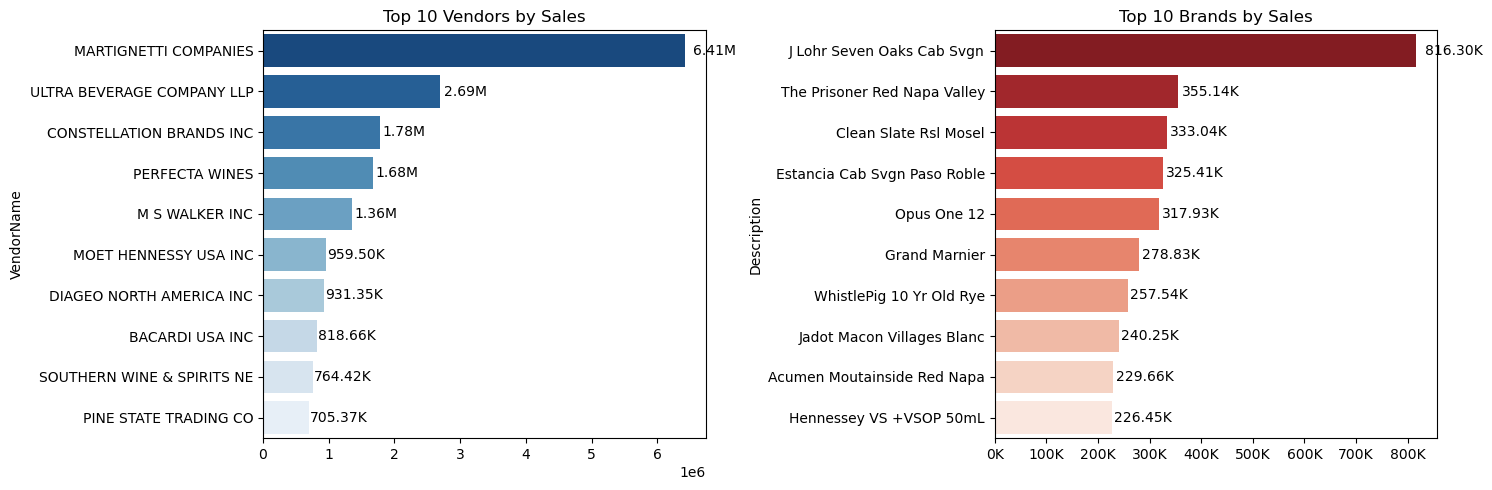

In [89]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + 0.02 * bar.get_width(),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')


plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + 0.02 * bar.get_width(),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

from matplotlib.ticker import FuncFormatter
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))


plt.tight_layout()
plt.show()


- `MARTIGNETTI COMPANIES` is the top vendor, generating over **6.4 million USD** in sales.
- Among brands, `J Lohr Seven Oaks Cab Svgn` leads with **816.3K USD** in sales.
- There is a significant sales gap between the top vendor and others, indicating vendor concentration.
- Brands show a more gradual sales decline, suggesting a broader spread in customer preference.

These insights can help focus promotional strategies on high-performing vendors and bestselling products.

In [143]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()    
    

In [145]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [147]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [131]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
38,MARTIGNETTI COMPANIES,4.70M,1.72M,6.41M,25.43
75,ULTRA BEVERAGE COMPANY LLP,1.78M,909.13K,2.69M,9.66
10,CONSTELLATION BRANDS INC,1.55M,229.70K,1.78M,8.41
48,PERFECTA WINES,990.72K,684.67K,1.68M,5.37
42,MOET HENNESSY USA INC,786.50K,173.00K,959.50K,4.26
36,M S WALKER INC,698.15K,658.15K,1.36M,3.78
15,DIAGEO NORTH AMERICA INC,658.62K,272.73K,931.35K,3.57
51,PINE STATE TRADING CO,548.22K,157.15K,705.37K,2.97
19,E & J GALLO WINERY,502.94K,82.93K,585.88K,2.72
3,BANFI PRODUCTS CORP,461.01K,61.16K,522.17K,2.50


In [149]:
top_vendors['PurchaseContribution%'].sum()

68.67

In [153]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
38,MARTIGNETTI COMPANIES,4.70M,1.72M,6.41M,25.43,25.43
75,ULTRA BEVERAGE COMPANY LLP,1.78M,909.13K,2.69M,9.66,35.09
10,CONSTELLATION BRANDS INC,1.55M,229.70K,1.78M,8.41,43.50
48,PERFECTA WINES,990.72K,684.67K,1.68M,5.37,48.87
42,MOET HENNESSY USA INC,786.50K,173.00K,959.50K,4.26,53.13
36,M S WALKER INC,698.15K,658.15K,1.36M,3.78,56.91
15,DIAGEO NORTH AMERICA INC,658.62K,272.73K,931.35K,3.57,60.48
51,PINE STATE TRADING CO,548.22K,157.15K,705.37K,2.97,63.45
19,E & J GALLO WINERY,502.94K,82.93K,585.88K,2.72,66.17
3,BANFI PRODUCTS CORP,461.01K,61.16K,522.17K,2.50,68.67


# Pareto Chart: Vendor Contribution to Total Purchases

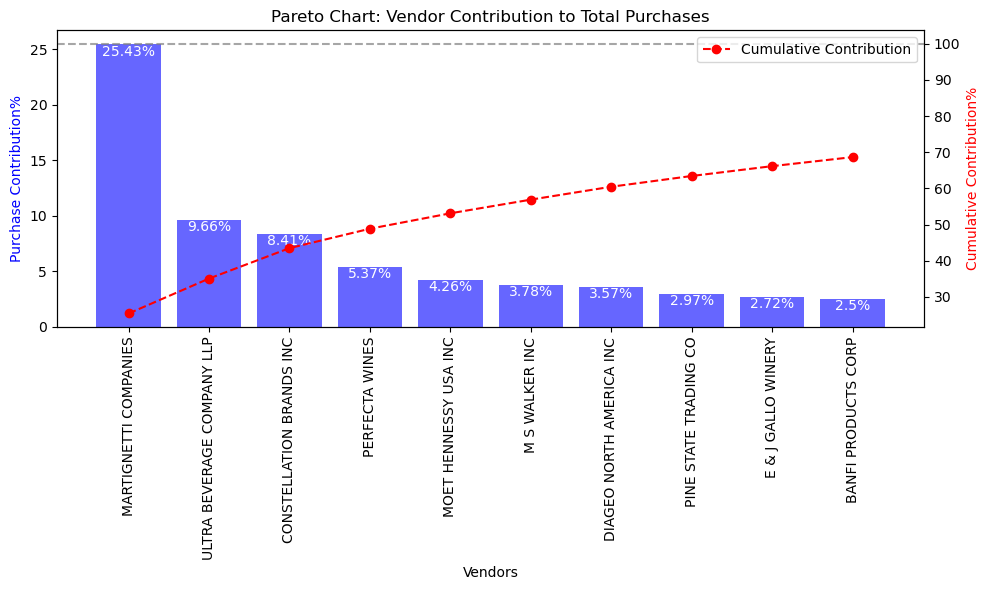

In [161]:
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(top_vendors['VendorName'], top_vendors['PurchaseContribution%'], color='blue', alpha=0.6)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'],
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

ax1.set_xticks(range(len(top_vendors)))
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)

ax1.set_ylabel('Purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

- This chart visualizes which vendors contribute the most to total purchases.
- Blue bars show each vendor's individual percentage contribution.
- Red dashed line shows cumulative contribution percentage across vendors.
- Useful to apply the 80/20 rule to focus on top contributing vendors.

In [165]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 68.67%


# Prepare data for pie chart

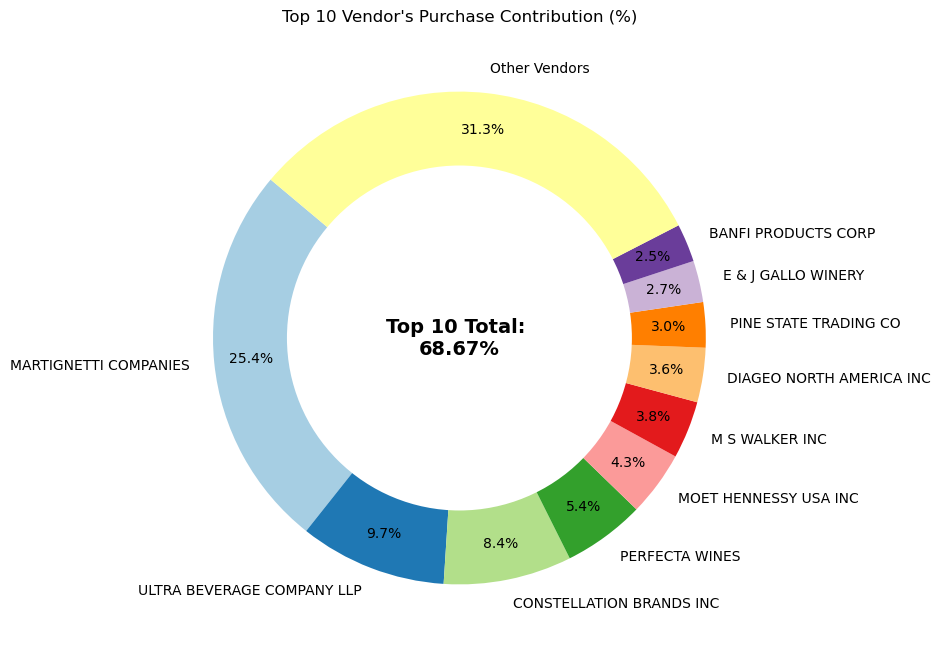

In [173]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

vendors.append('Other Vendors')
purchase_contribution.append(remaining_contribution)

fig, ax= plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct= '%1.1f%%',
                                  startangle =140, pctdistance= 0.85, colors= plt.cm.Paired.colors)

centre_circle = plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0,0, f"Top 10 Total: \n{total_contribution:.2f}%" , fontsize=14, fontweight= 'bold', ha ='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()
          

This donut chart visualizes the **purchase contribution percentage** of the **top 10 vendors**.
- Each slice represents a vendor’s **individual contribution** to the total purchase volume.
- The **center label** shows the **total cumulative contribution** of the top 10 vendors.
- The slice labeled **"Other Vendors"** shows the combined contribution from all remaining vendors not in the top 10.
- This helps in identifying **vendor concentration** and **dependence on key suppliers**.

#### 📌 Business Insight:

- If a few vendors account for a major portion of purchases, it's important to manage those relationships well.
- You may also explore diversification opportunities if one vendor dominates significantly.

In [175]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [179]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [185]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,94304
1,Large,58508
2,Large,55724
3,Large,11748
4,Large,1748
...,...,...
1771,Small,8
1772,Small,8
1773,Small,24
1774,Small,4


In [187]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,46.787329
Medium,27.817941
Large,12.698844


In [195]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
BROWN-FORMAN CORP,0.393983
WINE GROUP INC,0.496544
JEWELL TOWNE VINEYARDS,0.570007
CHARLES JACQUIN ET CIE INC,0.586178
CRUSH WINES,0.591196
THE IMPORTED GRAPE LLC,0.604167
PALM BAY INTERNATIONAL INC,0.610052
E & J GALLO WINERY,0.611842
VINILANDIA USA,0.615593


In [199]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df ['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital: ' , format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital:  1.14M


In [203]:
#This code calculates and displays the top 10 vendors with the highest total unsold inventory value, formatted in readable units
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = 'UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
38,MARTIGNETTI COMPANIES,829.50K
10,CONSTELLATION BRANDS INC,503.71K
19,E & J GALLO WINERY,164.55K
42,MOET HENNESSY USA INC,163.66K
3,BANFI PRODUCTS CORP,156.22K
51,PINE STATE TRADING CO,121.82K
14,DIAGEO CHATEAU ESTATE WINES,105.45K
25,FREDERICK WILDMAN & SONS,90.12K
73,TREASURY WINE ESTATES,83.34K
58,SAZERAC CO INC,51.73K


In [205]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.75)

In [209]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [211]:
top_vendors


0        4.459395
1        1.794821
2        1.020730
3       13.627649
4       12.178630
          ...    
1020    94.675817
1094    96.763107
1157    96.891545
1352    96.669680
1532    98.367127
Name: ProfitMargin, Length: 444, dtype: float64

In [213]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1+ confidence) /2, df = len(data) -1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# 📈 Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)

Top Vendors 95% CI: ( 33.49, 38.58), Mean:36.04
Low Vendors 95% CI: ( 51.68, 54.67), Mean:53.17


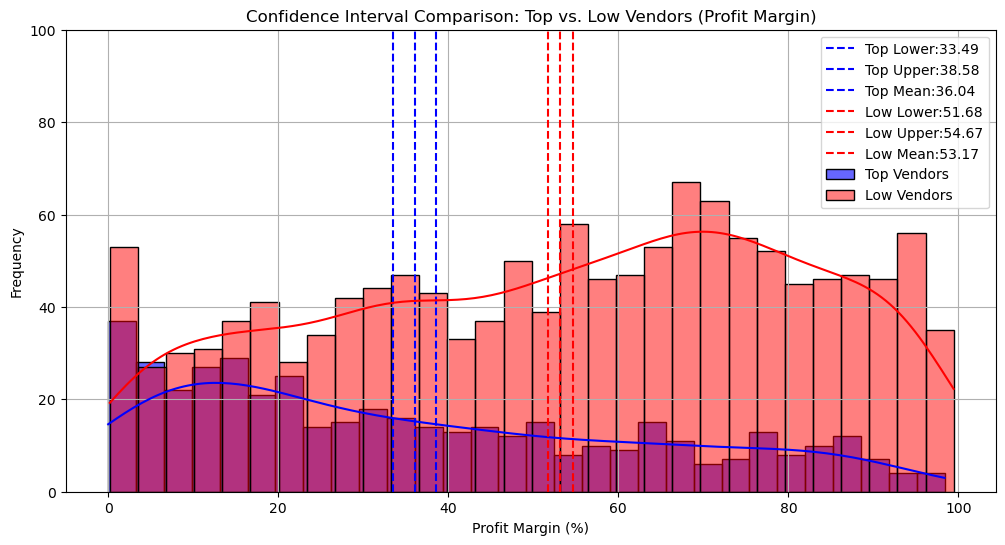

In [227]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower: .2f}, {top_upper:.2f}), Mean:{top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower: .2f}, {low_upper:.2f}), Mean:{low_mean:.2f}")

plt.figure(figsize=(12,6))

sns.histplot(top_vendors, kde= True, color='blue', bins=30, alpha=0.6, label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label = f"Top Lower:{top_lower:.2f}")
plt.axvline(top_upper, color='blue', linestyle='--', label = f"Top Upper:{top_upper:.2f}")
plt.axvline(top_mean, color='blue', linestyle='--', label = f"Top Mean:{top_mean:.2f}")

sns.histplot(low_vendors, kde= True, color='red', bins=30, alpha=0.5, label='Low Vendors')
plt.axvline(low_lower, color='red', linestyle='--', label = f"Low Lower:{low_lower:.2f}")
plt.axvline(low_upper, color='red', linestyle='--', label = f"Low Upper:{low_upper:.2f}")
plt.axvline(low_mean, color='red', linestyle='--', label = f"Low Mean:{low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.ylim(0,100)
plt.grid(True)
plt.show()

- The image shows a bar plot with confidence intervals and density curves comparing profit margins between top vendors and low vendors. 
- It highlights the differences in profit margins distribution, with the confidence intervals indicating the range for each group, and the curves     showing the density or distribution shape.

In [229]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.75)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

print(f"T-Statistic: {t_stat: .4f}, P-Value: {p_value: .4f}")

if p_value<0.05:
    print("There is a significant difference in Profit margins between top and Low-performing vendors.")
else:
    print("No significant difference in Profit margins.")

T-Statistic: -11.4109, P-Value:  0.0000
There is a significant difference in Profit margins between top and Low-performing vendors.


A two-sample independent t-test was conducted to compare the **Profit Margins** between top-performing and low-performing vendors based on their total sales.

- **Top vendors** were defined as those whose `TotalSalesDollars` are greater than or equal to the 75th percentile.
- **Low vendors** were defined as those whose `TotalSalesDollars` are less than or equal to the 75th percentile.

The test results showed:
- **T-Statistic**: -11.4109
- **P-Value**: 0.0000

Since the p-value is less than 0.05, we **reject the null hypothesis**, concluding that there is a **statistically significant difference** in profit margins between top and low-performing vendors.
